# Example usage of Stokes Class

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pybbtd.stokes as stokes
import pybbtd.btd as btd
from pybbtd.solvers import stokes_admm
from tensorly import unfold
import warnings
from tensorly.tenalg import khatri_rao
import matplotlib.pyplot as plt
warnings.simplefilter("always", UserWarning)  

In [281]:
# Create Stokes model
R = 5
L = 5
btd.validate_R_L(R, L)
X = stokes.Stokes([150, 150], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (150, 150, 4) on LL1 mode.


In [282]:
# Create ground truth tensor
np.random.seed(10)
[A0, B0, C0], T0 = X.generate_stokes_tensor()

In [283]:
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 0 * 1e-5 * np.random.randn(*X.dims)

In [324]:
X.fit(data = Tnoisy, algorithm='ADMM', init="kmeans", max_iter=10000, rho=1, max_admm=1, rel_tol=10**-8, abs_tol=10**-15, admm_tol=10**-10)

Reached absolute tolerance threshold. Exiting.


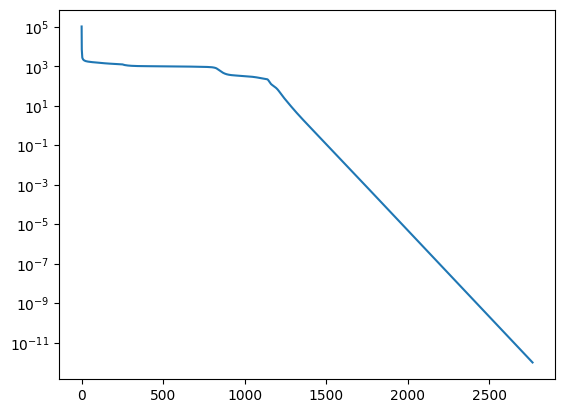

In [325]:
plt.semilogy(X.fit_error)

In [326]:
stokes.validate_stokes_tensor(Tnoisy)

All pixels satisfy the Stokes constraints.


In [355]:
brain_arr = np.load('/Users/saulobarreto/Documents/pyBBTD/notebooks/data/StokesTensor100.npy')
R = 4
L = 30
S = stokes.Stokes([brain_arr.shape[0], brain_arr.shape[1]], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (100, 100, 4) on LL1 mode.


In [356]:
#S.fit(brain_arr, 'ADMM', init="random", max_iter=10000)
S.fit(brain_arr, 'ADMM', init="random", max_iter=1000, rho=1, max_admm=1, rel_tol=10**-8, abs_tol=10**-8, admm_tol=10**-6)

Reached max number of iteration. Check convergence.


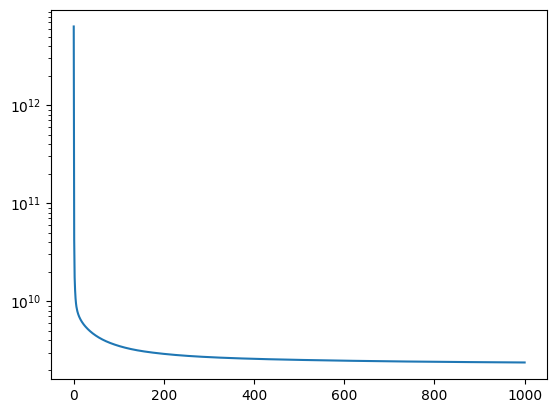

In [357]:
plt.semilogy(S.fit_error)

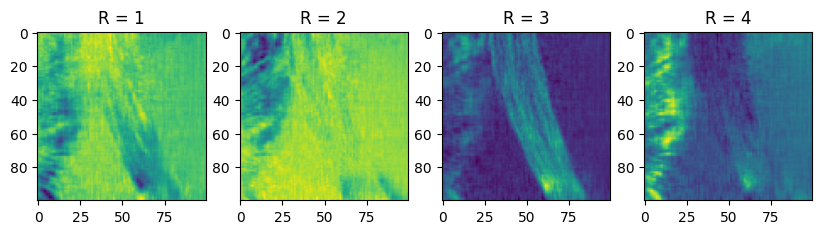

In [358]:
Aest = S.factors[0]
Best = S.factors[1]
Cest = S.factors[2]

fig, axes = plt.subplots(1, R, figsize=(10, 5))

for r in range(R):
    axes[r].imshow(Aest[:, r*L:(r+1)*L] @ Best[:, r*L:(r+1)*L].T)
    axes[r].set_title(f"R = {r+1}")
plt.show()
